In [1]:
# ✅ Required Libraries
import cv2
from PIL import Image
import pytesseract
from transformers import BlipProcessor, BlipForConditionalGeneration
import pyttsx3
import torch
import os
import numpy as np
from IPython.display import display, Audio


In [2]:
# 🔧 Tesseract path (adjust if installed elsewhere)
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

# 🧠 Load BLIP captioning model
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base", use_fast=False)
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")



In [3]:
#Text Cleaning Function
def clean_text(text):
    text = text.replace('\n', ' ').replace('\x0c', '').strip()
    return ' '.join(text.split())

In [4]:
#Offline TTS Function
def speak_offline(text):
    engine = pyttsx3.init()
    engine.setProperty('rate', 160)  # speed
    engine.setProperty('volume', 1.0)
    engine.say(text)
    engine.runAndWait()


✅ Image captured


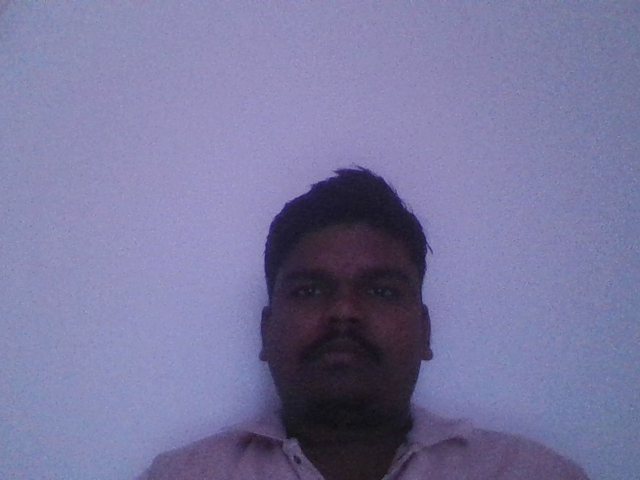

In [5]:
# ✅ Capture image from webcam
cam = cv2.VideoCapture(0)
ret, frame = cam.read()
cam.release()

if not ret:
    print("❌ Failed to capture image")
else:
    print("✅ Image captured")
    img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    img = Image.fromarray(img_rgb)
    display(img)


In [6]:
# 🔍 OCR
ocr_text = pytesseract.image_to_string(img)
print("📝 OCR Text:", ocr_text.strip())

# 📸 Captioning
inputs = processor(img, return_tensors="pt")
out = model.generate(**inputs)
caption = processor.decode(out[0], skip_special_tokens=True)
print("🖼️ Caption:", caption)

# ✨ Clean and Combine
cleaned_ocr = clean_text(ocr_text)
cleaned_caption = clean_text(caption)
final_description = f"{cleaned_caption}. The text on the image reads: {cleaned_ocr}."
print("🧠 Final Description:\n", final_description)

# 🎤 Offline Speech
speak_offline(final_description)


📝 OCR Text: 
🖼️ Caption: a man in a pink shirt is holding a cell
🧠 Final Description:
 a man in a pink shirt is holding a cell. The text on the image reads: .
